In [ ]:
#samples the movielens 100k dataset, use for debugging

import pandas as pd

num_users = 150
num_movies = 200

u1base = pd.read_csv("src/data/ml-100k/raw/u1.base", sep='\t', header=None)
u1base = u1base[(u1base.iloc[:,0]<num_users)&(u1base.iloc[:,1]<num_movies)]
#print(u1base.head)
u1base.to_csv("u1.base", sep='\t', header=False, index=False)

u1test = pd.read_csv("gcmc/src/data/ml-100k/raw/u1.test", sep='\t', header=None)
u1test = u1test[(u1test.iloc[:,0]<num_users)&(u1test.iloc[:,1]<num_movies)]
#print(u1test.head)
u1test.to_csv("u1.test", sep='\t', header=False, index=False)

In [ ]:
#creates cold start users within the movielens 100k dataset

import pandas as pd
import numpy as np

num_cold_users = 150
num_reviews = 5

u1base = pd.read_csv("src/data/ml-100k/raw/u1.base", sep='\t', header=None)
unique_users = u1base[0].unique()
cold_users = np.random.choice(unique_users, num_cold_users, replace=False)
#print(cold_users)
cold_u1base = u1base[u1base[0].isin(cold_users)].groupby(0).sample(n=num_reviews)
#print(u1base[u1base[0].isin(cold_users)])
new_u1base = u1base[~u1base[0].isin(cold_users)].append(cold_u1base).sort_values(by=[0]).reset_index(drop=True)
assert len(u1base) - len(u1base[u1base[0].isin(cold_users)]) + len(cold_u1base) == len(new_u1base)
new_u1base.to_csv("u1.base", sep='\t', header=False, index=False)

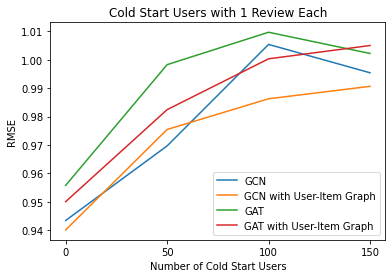

In [73]:
import matplotlib.pyplot as plt

x = [0,50,100,150]
gcn = [0.943471,0.969709,1.005414,0.995435]
gcn_with_uv = [0.940150,0.975488,0.986285,0.990673]
gat = [0.955823,0.998292,1.009697,1.002228]
gat_with_uv = [0.950096,0.982465,1.000350,1.005025]

plt.title("Cold Start Users with 1 Review Each")
plt.xlabel("Number of Cold Start Users")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

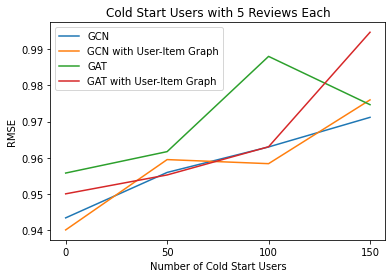

In [74]:
import matplotlib.pyplot as plt

x = [0,50,100,150]
gcn = [0.943471,0.955991,0.963016,0.971177]
gcn_with_uv = [0.940150,0.959532,0.958411,0.975989]
gat = [0.955823,0.961728,0.987975,0.974667]
gat_with_uv = [0.950096,0.955298,0.963067,0.994631]

plt.title("Cold Start Users with 5 Reviews Each")
plt.xlabel("Number of Cold Start Users")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

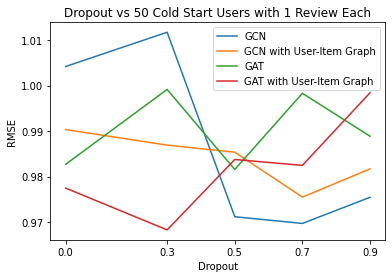

In [75]:
import matplotlib.pyplot as plt

x = [0.0, 0.3, 0.5, 0.7, 0.9]
gcn = [1.004178,1.011700,0.971178,0.969709,0.975451]
gcn_with_uv = [0.990326,0.986907,0.985355,0.975488,0.981689]
gat = [0.982694,0.999144,0.981554,0.998292,0.988864]
gat_with_uv = [0.977467,0.968285,0.983754,0.982465,0.998412]

plt.title("Dropout vs 50 Cold Start Users with 1 Review Each")
plt.xlabel("Dropout")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

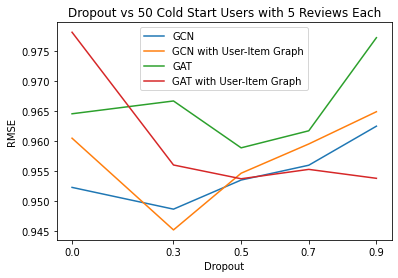

In [79]:
import matplotlib.pyplot as plt

x = [0.0, 0.3, 0.5, 0.7, 0.9]
gcn = [0.952297,0.948672,0.953523,0.955991,0.962495]
gcn_with_uv = [0.960494,0.945212,0.954658,0.959532,0.964905]
gat = [0.964563,0.966695,0.958888,0.961728,0.977239]
gat_with_uv = [0.978146,0.956030,0.953734,0.955298,0.953809]

plt.title("Dropout vs 50 Cold Start Users with 5 Reviews Each")
plt.xlabel("Dropout")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

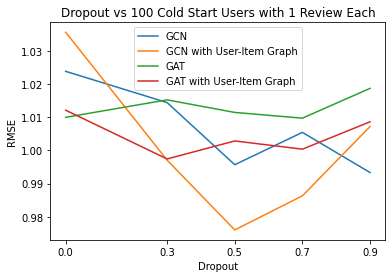

In [78]:
import matplotlib.pyplot as plt

x = [0.0, 0.3, 0.5, 0.7, 0.9]
gcn = [1.023807,1.014391,0.995666,1.005414,0.993313]
gcn_with_uv = [1.035588,0.997045,0.976016,0.986285,1.007166]
gat = [1.009950,1.015210,1.011420,1.009697,1.018678]
gat_with_uv = [1.012101,0.997403,1.002829,1.000350,1.008598]

plt.title("Dropout vs 100 Cold Start Users with 1 Review Each")
plt.xlabel("Dropout")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

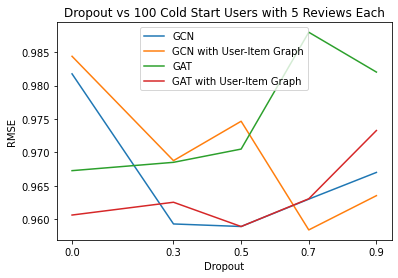

In [81]:
import matplotlib.pyplot as plt

x = [0.0, 0.3, 0.5, 0.7, 0.9]
gcn = [0.981750,0.959303,0.958922,0.963016,0.967010]
gcn_with_uv = [0.984379,0.968772,0.974663,0.958411,0.963535]
gat = [0.967274,0.968520,0.970502,0.987975,0.982017]
gat_with_uv = [0.960636,0.962549,0.958918,0.963067,0.973276]

plt.title("Dropout vs 100 Cold Start Users with 5 Reviews Each")
plt.xlabel("Dropout")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

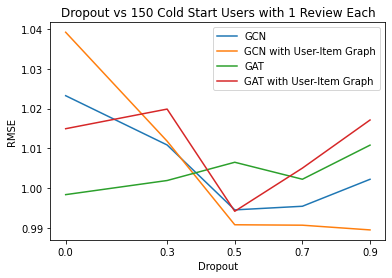

In [83]:
import matplotlib.pyplot as plt

x = [0.0, 0.3, 0.5, 0.7, 0.9]
gcn = [1.023235,1.010845,0.994523,0.995435,1.002215]
gcn_with_uv = [1.039191,1.011803,0.990782,0.990673,0.989486]
gat = [0.998358,1.001908,1.006498,1.002228,1.010803]
gat_with_uv = [1.014935,1.019869,0.994170,1.005025,1.017124]

plt.title("Dropout vs 150 Cold Start Users with 1 Review Each")
plt.xlabel("Dropout")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()

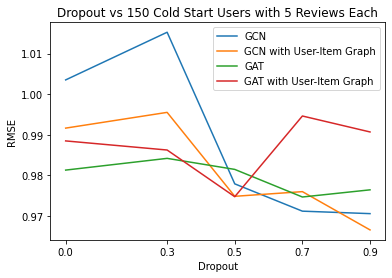

In [84]:
import matplotlib.pyplot as plt

x = [0.0, 0.3, 0.5, 0.7, 0.9]
gcn = [1.003528,1.015275,0.977907,0.971177,0.970568]
gcn_with_uv = [0.991645,0.995527,0.974838,0.975989,0.966555]
gat = [0.981300,0.984190,0.981470,0.974667,0.976433]
gat_with_uv = [0.988490,0.986248,0.974741,0.994631,0.990699]

plt.title("Dropout vs 150 Cold Start Users with 5 Reviews Each")
plt.xlabel("Dropout")
plt.ylabel("RMSE")
plt.xticks(x)
plt.plot(x, gcn, label="GCN")
plt.plot(x, gcn_with_uv, label="GCN with User-Item Graph")
plt.plot(x, gat, label="GAT")
plt.plot(x, gat_with_uv, label="GAT with User-Item Graph")
plt.legend()
plt.show()